In [1]:
import pandas as pd
from datetime import timedelta
#Data processing
from sklearn import preprocessing

In [2]:
df = pd.read_parquet('../../Sonar/seatunnel_all_information.parquet')

In [3]:
df['time'] = df['total_time'].astype('int64')

In [4]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time', 'total_time'])]

In [5]:
X

,commits,additions,deletions,changed_files,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,time
0,1,10,4,3,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0,264468000000000
1,1,2,1,1,500.0,262.0,262.0,304.0,304.0,501.0,262.0,262.0,304.0,693.0,274510000000000
2,1,36,67,9,500.0,262.0,262.0,304.0,304.0,499.0,261.0,261.0,304.0,693.0,19443000000000
3,1,21,2,3,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0,346946000000000
4,8,211,212,80,499.0,261.0,261.0,304.0,304.0,500.0,262.0,262.0,304.0,693.0,1039167000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,4,191,40,12,16.0,14.0,14.0,7.0,7.0,16.0,15.0,15.0,7.0,102.0,2590000000000
1064,6,470,42,16,14.0,12.0,12.0,8.0,8.0,16.0,14.0,14.0,7.0,89.0,68499000000000
1065,2,69,49,9,14.0,12.0,12.0,8.0,8.0,16.0,14.0,14.0,7.0,89.0,982000000000
1066,1,11,1128,27,2.0,3.0,3.0,3.0,3.0,16.0,14.0,14.0,7.0,89.0,2015000000000


In [6]:
cl = list(df['total_time'])


In [7]:
scaler = preprocessing.StandardScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [8]:
df_scaler.shape

(15, 1068)

In [9]:
scaler_1 = preprocessing.MinMaxScaler()
scaler_1

MinMaxScaler()

In [10]:
df_scaler

array([[-0.42596475, -0.42596475, -0.42596475, ..., -0.3000499 ,
        -0.42596475, -0.42596475],
       [-0.18637973, -0.19174952, -0.1689279 , ..., -0.1467775 ,
        -0.1857085 , -0.1689279 ],
       [-0.10965006, -0.11246059, -0.05062898, ..., -0.06749214,
         0.94336106, -0.11339743],
       ...,
       [ 1.61264794,  1.61264794,  1.61264794, ..., -1.25918689,
        -1.25918689, -1.24951741],
       [ 1.49403151,  1.49403151,  1.49403151, ..., -1.44065797,
        -1.44065797, -1.44065797],
       [-0.06703928, -0.05292508, -0.41142581, ..., -0.43737304,
        -0.43592114, -0.4379746 ]])

In [11]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [13]:
len(df_scaler)

15

In [14]:
number_of_cluster

[[0.6316, 2],
 [0.6887, 3],
 [0.6666, 4],
 [0.595, 5],
 [0.5635, 6],
 [0.2217, 7],
 [0.2595, 8],
 [0.2764, 9],
 [0.4037, 10],
 [0.432, 11],
 [0.4, 12],
 [0.4, 13],
 [0.4, 14]]

In [15]:
number_of_cluster.append([sil_avg , i])

In [16]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 3


In [17]:
sil_avg

0.4

In [18]:
km

KMeans(n_clusters=14)

In [19]:
import numpy as np

from sklearn.datasets import make_blobs

np.random.seed(0)

batch_size = 45
centers = number_of_cluster
n_clusters = len(centers)
X , labels_true = make_blobs(n_samples=30000, centers=centers, cluster_std=0.7)

In [20]:
import time

from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=max(number_of_cluster)[1], n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [21]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=max(number_of_cluster)[1],
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [22]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

In [23]:
k_means_labels

array([1, 2, 0, ..., 2, 0, 1], dtype=int64)

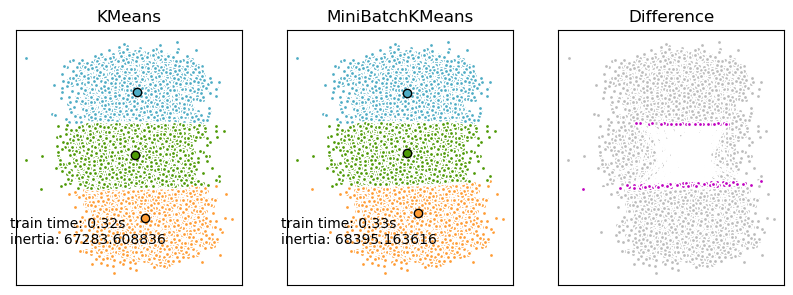

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identical = np.logical_not(different)
ax.plot(X[identical, 0], X[identical, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(X[different, 0], X[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

In [25]:
my_members

array([False,  True, False, ...,  True, False, False])

In [26]:
cluster_center

array([0.36483549, 8.38266364])

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def silhouette(data, n):
	k= range(2,len(df_scaler)) 
	s = []
	# for i in range(2, len(df_scaler)):
    # km = KMeans(n_clusters = i)
    # km.fit(df_scaler)
    # sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    # number_of_cluster.append([sil_avg , i])

	for n_clusters in k:
		clusters = KMeans(n_clusters = n_clusters, init = 'k-means++')
		clusters.fit(data)
		labels = clusters.labels_
		centroids = clusters.cluster_centers_
		s.append(silhouette_score(data, labels, metric='euclidean'))
		print("Silhouette Coefficient for k == %s: %s" % (
		n_clusters, round(silhouette_score(data, clusters.labels_), 4)))

	fig = plt.figure()
	ax = fig.add_subplot(111)
	ax.plot(k,s,'b*-')
	ax.plot(k[np.argmax(s)], s[np.argmax(s)], marker='o', markersize=12,markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
	plt.ylabel("Silouette Score")
	plt.xlabel("Number of clusters")
	plt.title("Silouette for KMeans clustering")
	plt.show()


In [28]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
cluster3 = np.random.uniform(6.5, 7.5, (2, 10))

[[0.78836714 1.22355158]
 [1.42907482 0.63517149]
 [0.82118572 1.1058583 ]
 [0.67523452 1.11208404]
 [1.13016573 0.95099428]
 [1.05424513 0.67643223]
 [1.11804593 0.80138612]
 [0.52882538 1.36852459]
 [1.22954863 0.93872664]
 [0.8729848  1.07197313]
 [4.35115762 3.91478739]
 [3.64432111 3.61416908]
 [3.55930595 3.82063097]
 [4.20725615 4.11302349]
 [4.27054104 4.01929709]
 [3.73166058 4.39022094]
 [4.46543772 3.90532499]
 [3.93594916 3.73127672]
 [3.66955968 4.41864527]
 [3.578101   3.92611009]
 [7.08517993 6.86094243]
 [7.20731746 6.55310909]
 [7.47949368 7.47018673]
 [7.05391502 7.01014191]
 [7.40112931 6.99680438]
 [7.06719478 6.90312309]
 [6.98181826 6.53803384]
 [7.45598116 7.41306522]
 [6.99146203 7.33506995]
 [6.5439606  7.29614839]]


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 2: 0.6873


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 3: 0.8765


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 4: 0.7461


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 5: 0.6081


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 6: 0.4659


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 7: 0.5405


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 8: 0.5764


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 9: 0.5765


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 10: 0.5405


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 11: 0.5175


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 12: 0.5012


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 13: 0.4807


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient for k == 14: 0.4725


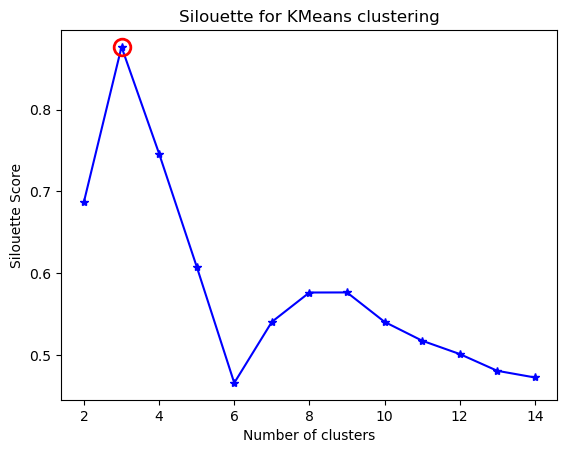

In [29]:
data = np.hstack((cluster1, cluster2,cluster3)).T
print(data)
silhouette(data, 10)

In [30]:
max(number_of_cluster)[1]

3

In [31]:
kmeans = KMeans(n_clusters=max(number_of_cluster)[1])
kmeans.fit(data)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
kmeans = KMeans(n_clusters=len(centers))
kmeans.fit(df_scaler)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\Temp\ipykernel_9840\3244606647.py:2: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  kmeans.fit(df_scaler)


KMeans(n_clusters=14)

In [33]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-0.15503719, -0.18879453, -0.05376519, ..., -0.05376519,
         0.25005081, -0.18879453],
       [ 1.4142437 ,  1.42572702,  1.4142437 , ..., -1.42213579,
        -1.42213579, -1.44510243],
       [-0.42596475, -0.42596475, -0.42596475, ..., -0.3000499 ,
        -0.42596475, -0.42596475],
       ...,
       [ 1.61264794,  1.61264794,  1.61264794, ..., -1.25918689,
        -1.25918689, -1.24951741],
       [ 0.95515334,  0.95528776,  0.94358569, ..., -1.01441354,
        -0.96314137, -1.0652005 ],
       [ 1.40254299,  1.40254299,  1.40254299, ..., -1.43274357,
        -1.53481388, -1.53481388]])

In [34]:
# Get the cluster labels for each data point
cluster_labels = kmeans.labels_
cluster_labels

array([ 2,  4,  5,  0, 10,  8,  8,  6,  6,  7,  1,  1, 11,  9,  3])

In [35]:
# Create a DataFrame to store the cluster information
data_clusters = pd.DataFrame(df, columns=df.columns)

In [36]:
cluster_labels

array([ 2,  4,  5,  0, 10,  8,  8,  6,  6,  7,  1,  1, 11,  9,  3])